In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Artificial_Intelligence_Engineering/AIA/1_Churn_Modelling.csv')

In [ ]:
# Business problem:-To find out whether customers will leave the bank or not.

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## missing values check
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
# Converison of categorical data
Geography=pd.get_dummies(data.Geography,drop_first = True)
Gender=pd.get_dummies(data.Gender,drop_first=True)

In [10]:
Geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [11]:
Gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [12]:
data=pd.concat([data,Geography,Gender],axis=1)

In [13]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
data.drop(['Geography','Gender'],axis=1,inplace=True)

In [15]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
data.columns

In [ ]:
data.head()

In [16]:
## Creating independent and dependent variable.
X=data.loc[:,['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary','Germany', 'Spain', 'Male']]
y=data.Exited

In [ ]:
y

In [27]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
## Training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.models import Sequential

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
## Sequential modelling and functional modelling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout # used to prevent overfitting

In [23]:
# Defining the model
model=Sequential()

In [ ]:
X_train

In [26]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [24]:
# Adding input layer to first hidden layer
model.add(Dense(units=11,input_dim=11,activation='relu',
                kernel_initializer='he_uniform'))

# Adding first hidden layer to second hidden layer
model.add(Dense(units=16,activation='relu',kernel_initializer='he_uniform'))

# Adding second hidden layer to third hidden layer
model.add(Dense(units=8,activation='relu',kernel_initializer='he_uniform'))

# Adding third hidden layer to output layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer = 'glorot_uniform'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 16)                192       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 469 (1.83 KB)
Trainable params: 469 (1.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
...
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
X_train.shape

In [29]:
# fit the keras model on the dataset
model_history=model.fit(X_train, y_train, epochs=15,validation_split=0.33, batch_size=10)

Epoch 1/15
503/503 [==============================] - 6s 4ms/step - loss: 0.6892 - accuracy: 0.6596 - val_loss: 0.4720 - val_accuracy: 0.8009
Epoch 2/15
503/503 [==============================] - 2s 5ms/step - loss: 0.4654 - accuracy: 0.7884 - val_loss: 0.4212 - val_accuracy: 0.8118
Epoch 3/15
503/503 [==============================] - 2s 5ms/step - loss: 0.4307 - accuracy: 0.8077 - val_loss: 0.3903 - val_accuracy: 0.8429
Epoch 4/15
503/503 [==============================] - 3s 5ms/step - loss: 0.4011 - accuracy: 0.8230 - val_loss: 0.3668 - val_accuracy: 0.8534
Epoch 5/15
503/503 [==============================] - 3s 6ms/step - loss: 0.3844 - accuracy: 0.8370 - val_loss: 0.3516 - val_accuracy: 0.8566
Epoch 6/15
503/503 [==============================] - 2s 4ms/step - loss: 0.3731 - accuracy: 0.8410 - val_loss: 0.3491 - val_accuracy: 0.8578
Epoch 7/15
503/503 [==============================] - 2s 4ms/step - loss: 0.3675 - accuracy: 0.8416 - val_loss: 0.3444 - val_accuracy: 0.8590
Epoch 

In [30]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

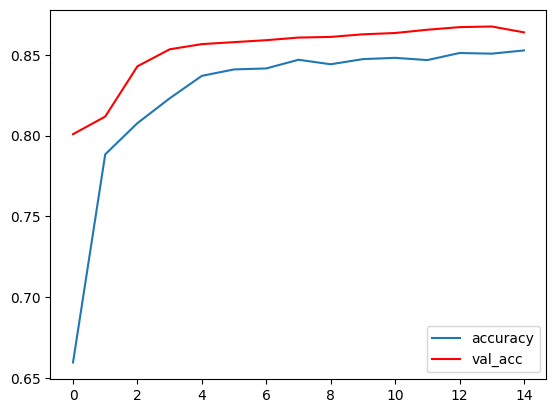

In [35]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'],label='accuracy')
plt.plot(model_history.history['val_accuracy'],color='red',label='val_acc')
plt.legend()


In [36]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)


79/79 [==============================] - 0s 2ms/step


In [40]:
y_test

9957    0
1687    0
2116    0
231     0
2780    0
       ..
8514    0
5190    0
6766    1
347     0
6961    0
Name: Exited, Length: 2500, dtype: int64

In [39]:

y_pred

array([[0.02941648],
       [0.05561687],
       [0.02346695],
       ...,
       [0.3392252 ],
       [0.32498604],
       [0.01088982]], dtype=float32)

In [43]:
abc = []
for i in y_pred:
  if i[0] <= 0.5:
      abc.append(0)
  else:
    abc.append(1)
abc = np.array(abc)

In [44]:
abc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
## < 0.5 = 0
## >= 0.5 = 1

y_prediction = np.array([1 if i >= 0.5 else 0 for i in y_pred.reshape(2500,)])

In [ ]:
accuracy_score(y_test,y_prediction)

0.8536

In [ ]:
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8536


[0.35646143555641174, 0.853600025177002]

In [ ]:
...
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test)
accuracy

In [ ]:
# list all data in history
print(model_history.history.keys())

In [ ]:
model_history.history

{'loss': [0.5973916053771973,
  0.48423445224761963,
  0.44489070773124695,
  0.4199221134185791,
  0.4019611179828644,
  0.3873191773891449,
  0.3787798583507538,
  0.3742377460002899,
  0.36999914050102234,
  0.3661797046661377,
  0.3635118305683136,
  0.3610680401325226,
  0.3599254786968231,
  0.35715600848197937,
  0.3554030656814575],
 'accuracy': [0.7352706789970398,
  0.7900079488754272,
  0.8047372698783875,
  0.8206608295440674,
  0.8353901505470276,
  0.840167224407196,
  0.8441480994224548,
  0.8451433181762695,
  0.8487260937690735,
  0.8505175113677979,
  0.8487260937690735,
  0.8509156107902527,
  0.850119411945343,
  0.8521098494529724,
  0.852707028388977],
 'val_loss': [0.5012956261634827,
  0.441378653049469,
  0.41160833835601807,
  0.3870084285736084,
  0.3708696663379669,
  0.35901081562042236,
  0.34997081756591797,
  0.3445422053337097,
  0.3438815772533417,
  0.34288129210472107,
  0.3414648473262787,
  0.33738377690315247,
  0.3356686532497406,
  0.33589777350

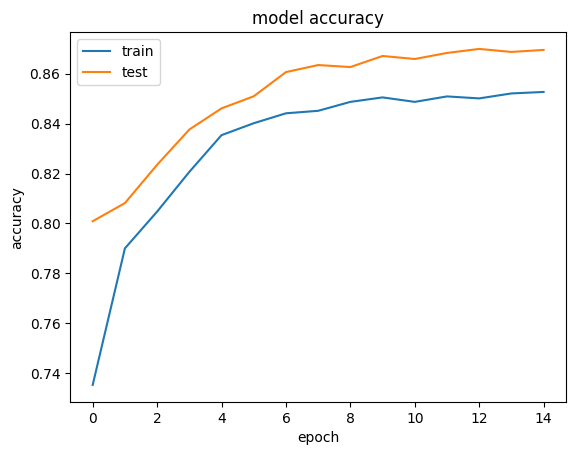

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

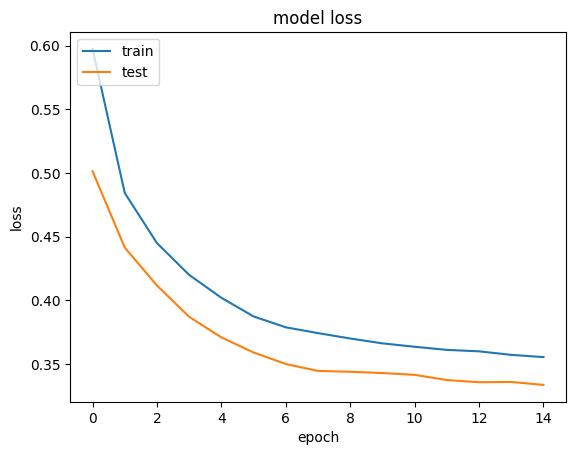

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score